<a href="https://colab.research.google.com/github/bkrfethi/DataScience-estin-Labs/blob/main/Lab5_Complex_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 Exercise 1: Text Data Processing (NLP)
**Dataset:** Sentiment140 (`training.1600000.processed.noemoticon.csv`)
**Objectif:** Nettoyage, Tokenization, Comparaison Stemming/Lemmatization, TF-IDF et Visualisation.

---

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from collections import Counter
import csv

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

cols = ['target', 'ids', 'date', 'flag', 'user', 'text']

try:
    print("Chargement du fichier CSV...")

    df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                     encoding='latin-1',
                     header=None,
                     names=cols,
                     quoting=csv.QUOTE_NONE,
                     on_bad_lines='skip',
                     low_memory=False)

    print(f"Dataset chargé avec succès ! Taille totale : {df.shape}")

    df = df.sample(n=50000, random_state=42).reset_index(drop=True)
    print(f"Echantillon utilisé pour le TP : {df.shape}")

except FileNotFoundError:
    print(" Fichier introuvable. Assurez-vous d'avoir uploadé 'training.1600000.processed.noemoticon.csv'")
except Exception as e:
    print(f"Autre erreur : {e}")

display(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Chargement du fichier CSV...
Dataset chargé avec succès ! Taille totale : (179871, 6)
Echantillon utilisé pour le TP : (50000, 6)


,target,ids,date,flag,user,text
0,"""1692129131""","""Sun May 03 19:20:15 PDT 2009""","""NO_QUERY""","""FadetoOctober""","""doing homework """,NaN
1,"""1556563034""","""Sat Apr 18 23:20:37 PDT 2009""","""NO_QUERY""","""Chinkyeyesz""",""" I'm Bored... Bored....Bored Again And Develo...",NaN
2,"""1680195285""","""Sat May 02 11:07:13 PDT 2009""","""NO_QUERY""","""Gigadelic""","""@kelsa not counting down","counting up how many days I have gone unsexed """
3,"""1932734411""","""Tue May 26 22:05:54 PDT 2009""","""NO_QUERY""","""WTFJAY""","""@tweenkle77 I cant find them. Smoking bars ju...","but I dont know where It sux lol"""
4,"""1553420526""","""Sat Apr 18 14:13:11 PDT 2009""","""NO_QUERY""","""LivLeigh""","""Microwaves are really fucking confusing """,NaN


In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

print("\n--- 1. TEXT CLEANING ---")

contractions_dict = {
    "don't": "do not", "can't": "cannot", "it's": "it is", "i'm": "i am",
    "i've": "i have", "won't": "will not", "didn't": "did not", "isn't": "is not"
}

def clean_text(text):
    # 1. Minuscules
    text = str(text).lower()
    # 2. Gestion des contractions
    for key, value in contractions_dict.items():
        text = re.sub(r"\b" + key + r"\b", value, text)
    # 3. Suppression Emojis/Caractères spéciaux
    text = re.sub(r'[^a-z\s]', '', text)
    # 4. Suppression espaces multiples
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

print("\n--- 2 & 3. TOKENIZATION & STOP WORDS ---")

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stop(text):
    tokens = word_tokenize(text)
    return [w for w in tokens if w not in stop_words and len(w) > 2] # On garde mots > 2 lettres

df['tokens'] = df['cleaned_text'].apply(tokenize_and_remove_stop)

print("Aperçu après nettoyage et tokenization :")
display(df[['text', 'cleaned_text', 'tokens']].head())


--- 1. TEXT CLEANING ---

--- 2 & 3. TOKENIZATION & STOP WORDS ---
Aperçu après nettoyage et tokenization :


,text,cleaned_text,tokens
0,NaN,nan,[nan]
1,NaN,nan,[nan]
2,"counting up how many days I have gone unsexed """,counting up how many days i have gone unsexed,"[counting, many, days, gone, unsexed]"
3,"but I dont know where It sux lol""",but i dont know where it sux lol,"[dont, know, sux, lol]"
4,NaN,nan,[nan]


In [4]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

print("\n--- 4. STEMMING vs LEMMATIZATION ---")

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

all_tokens = [word for sublist in df['tokens'] for word in sublist]
unique_words = list(set(all_tokens))[:20]
comparison = []
for word in unique_words:
    comparison.append({
        'Original': word,
        'Stemmed (Porter)': stemmer.stem(word),
        'Lemmatized (WordNet)': lemmatizer.lemmatize(word, pos='v')
    })

df_compare = pd.DataFrame(comparison)
display(df_compare)

print("Note : Le Stemming coupe brutalement la fin des mots (ex: 'running' -> 'run').")
print("La Lemmatization cherche la racine linguistique (ex: 'better' -> 'good').")


--- 4. STEMMING vs LEMMATIZATION ---


,Original,Stemmed (Porter),Lemmatized (WordNet)
0,laughin,laughin,laughin
1,delhi,delhi,delhi
2,wifi,wifi,wifi
3,socks,sock,sock
4,painful,pain,painful
5,jippie,jippi,jippie
6,ginger,ginger,ginger
7,java,java,java
8,pjs,pj,pjs
9,titanic,titan,titanic


Note : Le Stemming coupe brutalement la fin des mots (ex: 'running' -> 'run').
La Lemmatization cherche la racine linguistique (ex: 'better' -> 'good').


In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

print("\n--- 5. FEATURE EXTRACTION ---")

corpus = df['tokens'].apply(lambda x: ' '.join(x))

# A. Bag of Words (BoW)
vectorizer_bow = CountVectorizer(max_features=1000)
X_bow = vectorizer_bow.fit_transform(corpus)

print(f"Shape BoW Matrix: {X_bow.shape}")

# B. TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer_tfidf.fit_transform(corpus)

feature_names = vectorizer_tfidf.get_feature_names_out()
df_tfidf = pd.DataFrame(X_tfidf.toarray()[:10], columns=feature_names) # 10 premières lignes

print("Exemple de scores TF-IDF (10 premiers documents, Top Features) :")
display(df_tfidf.iloc[:, :10])


--- 5. FEATURE EXTRACTION ---
Shape BoW Matrix: (50000, 1000)
Exemple de scores TF-IDF (10 premiers documents, Top Features) :


,able,account,ache,acting,actually,add,advice,afford,afternoon,ages
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



--- 6. VISUALIZATION ---


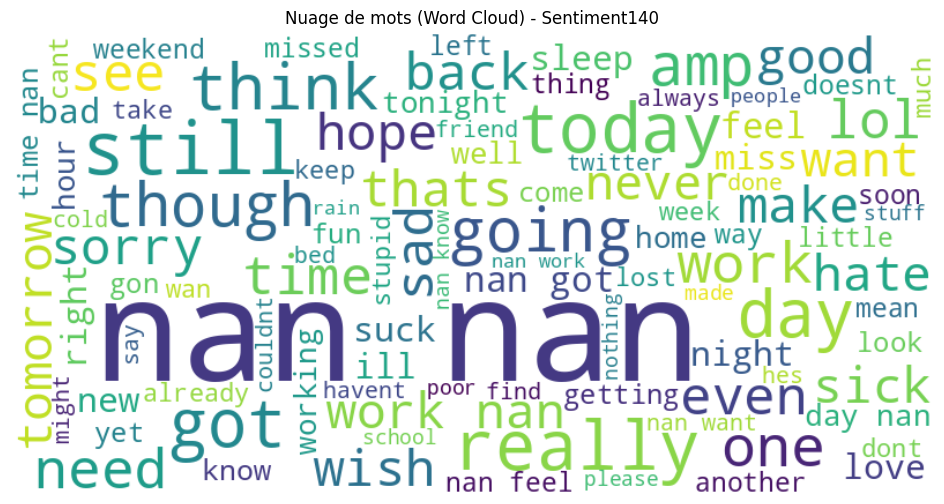

/tmp/ipython-input-1218446668.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


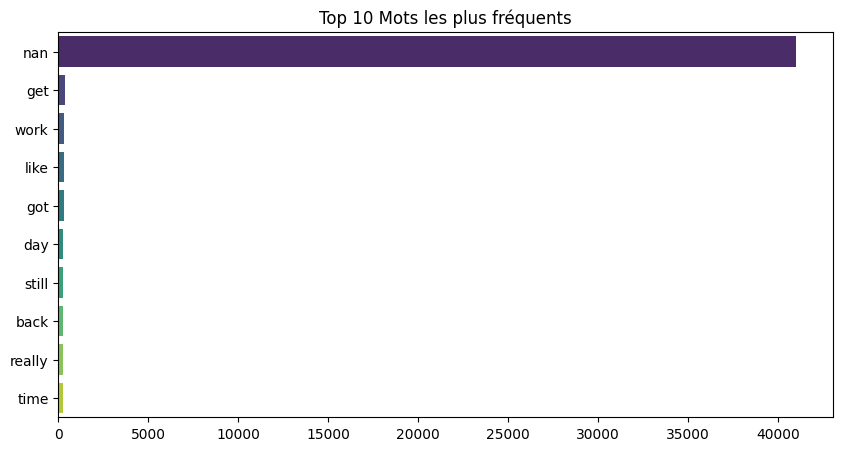


--- 7. N-GRAMS (BIGRAMS) ---
Top 5 Bigrams les plus fréquents :
('last', 'night'): 48
('feel', 'like'): 46
('wish', 'could'): 28
('looks', 'like'): 24
('mothers', 'day'): 22


In [6]:
print("\n--- 6. VISUALIZATION ---")

# A. Word Cloud
all_words_str = ' '.join(corpus)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words_str)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Nuage de mots (Word Cloud) - Sentiment140")
plt.show()

# B. Frequency Distribution
word_counts = Counter(all_tokens)
common_words = word_counts.most_common(10)

words = [x[0] for x in common_words]
counts = [x[1] for x in common_words]

plt.figure(figsize=(10, 5))
sns.barplot(x=counts, y=words, palette='viridis')
plt.title("Top 10 Mots les plus fréquents")
plt.show()

print("\n--- 7. N-GRAMS (BIGRAMS) ---")

# Extraction des bigrams (suites de 2 mots)
# Exemple : "data science", "not good"
def get_bigrams(tokens_list):
    return list(nltk.bigrams(tokens_list))

all_bigrams = [bigram for tokens in df['tokens'] for bigram in get_bigrams(tokens)]
bigram_counts = Counter(all_bigrams)

print("Top 5 Bigrams les plus fréquents :")
for bigram, count in bigram_counts.most_common(5):
    print(f"{bigram}: {count}")

# 🌍 Exercise 4: Geospatial Data Processing
**Topic:** Coordinate Systems, Projections, and Spatial Analysis
**Dataset:** World Cities (Major Cities > 1M pop)

---

In [ ]:
!pip install geopandas matplotlib seaborn scipy

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import radians, cos, sin, asin, sqrt
from shapely.geometry import Point

In [ ]:
print("--- STEP 1: LOADING DATA ---")

# Load the dataset (Make sure worldcities.csv is uploaded to Colab files)
try:
    df = pd.read_csv('worldcities.csv')

except FileNotFoundError:
    print("Error: Please upload 'worldcities.csv' to the Colab files area.")
    df = pd.DataFrame() # Create empty to avoid crashing next steps

if not df.empty:
    # Filter for major cities (Population > 1 million)
    major_cities = df[df['population'] > 1000000].copy()

    # Display first 10 cities with coordinates
    print(f"\nTotal Major Cities found: {len(major_cities)}")
    print("\nFirst 10 Major Cities:")
    print(major_cities[['city', 'lat', 'lng', 'country']].head(10))

    # Identify missing or invalid coordinates
    missing_coords = major_cities[major_cities['lat'].isnull() | major_cities['lng'].isnull()]
    print(f"\nCities with missing coordinates: {len(missing_coords)}")

    # Check for invalid lat (>90, <-90) or lng (>180, <-180)
    invalid_coords = major_cities[
        (major_cities['lat'] > 90) | (major_cities['lat'] < -90) |
        (major_cities['lng'] > 180) | (major_cities['lng'] < -180)
    ]
    print(f"Cities with invalid coordinates: {len(invalid_coords)}")

--- STEP 1: LOADING DATA ---

Total Major Cities found: 744

First 10 Major Cities:
          city      lat       lng       country
0        Tokyo  35.6870  139.7495         Japan
1      Jakarta  -6.1750  106.8275     Indonesia
2        Delhi  28.6100   77.2300         India
3    Guangzhou  23.1300  113.2600         China
4       Mumbai  19.0761   72.8775         India
5       Manila  14.5958  120.9772   Philippines
6     Shanghai  31.2286  121.4747         China
7    São Paulo -23.5504  -46.6339        Brazil
8        Seoul  37.5667  126.9833  Korea, South
9  Mexico City  19.4333  -99.1333        Mexico

Cities with missing coordinates: 0
Cities with invalid coordinates: 0


In [ ]:
print("\n--- STEP 2: DISTANCE CALCULATIONS ---")

def haversine(lon1, lat1, lon2, lat2):

    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers
    return c * r

def euclidean_dist(x1, y1, x2, y2):
    return sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Helper function to get coords
def get_coords(city_name):
    # We use 'iloc[0]' to get the first match (most prominent one usually)
    city_data = major_cities[major_cities['city'] == city_name]
    if not city_data.empty:
        return city_data.iloc[0]['lng'], city_data.iloc[0]['lat']
    return None, None

# Get coordinates
ny_lng, ny_lat = get_coords("New York")
lon_lng, lon_lat = get_coords("London")
par_lng, par_lat = get_coords("Paris")
tok_lng, tok_lat = get_coords("Tokyo")

if ny_lng is not None and lon_lng is not None:
    # 1. New York and London
    dist_hv_ny_lon = haversine(ny_lng, ny_lat, lon_lng, lon_lat)
    dist_eu_ny_lon = euclidean_dist(ny_lng, ny_lat, lon_lng, lon_lat)

    print(f"Distance NY -> London:")
    print(f"  Haversine (Real): {dist_hv_ny_lon:.2f} km")
    print(f"  Euclidean (Raw Degrees): {dist_eu_ny_lon:.2f} (Meaningless as distance)")

if par_lng is not None and tok_lng is not None:
    # 2. Paris and Tokyo
    dist_hv_par_tok = haversine(par_lng, par_lat, tok_lng, tok_lat)
    print(f"Distance Paris -> Tokyo:")
    print(f"  Haversine (Real): {dist_hv_par_tok:.2f} km")

print("\nObservation: Euclidean distance on Lat/Lon treats the Earth as a flat plane \nand degrees as constant units, which is incorrect for global distances.")


--- STEP 2: DISTANCE CALCULATIONS ---
Distance NY -> London:
  Haversine (Real): 5566.21 km
  Euclidean (Raw Degrees): 74.59 (Meaningless as distance)
Distance Paris -> Tokyo:
  Haversine (Real): 9714.64 km

Observation: Euclidean distance on Lat/Lon treats the Earth as a flat plane 
and degrees as constant units, which is incorrect for global distances.


In [ ]:
print("\n--- STEP 3: SPATIAL OPERATIONS ---")

# A. Cities within 500 km of Paris
# We apply the haversine function to the whole dataframe against Paris coords
if par_lng is not None:
    major_cities['dist_to_paris'] = major_cities.apply(
        lambda row: haversine(par_lng, par_lat, row['lng'], row['lat']), axis=1
    )

    near_paris = major_cities[major_cities['dist_to_paris'] <= 500]
    print(f"Cities within 500km of Paris: {len(near_paris)}")
    print(near_paris[['city', 'country', 'dist_to_paris']].to_string(index=False))

# B. Buffer around Cairo (1000 km)
cai_lng, cai_lat = get_coords("Cairo")
if cai_lng is not None:
    # Identify cities in buffer
    major_cities['dist_to_cairo'] = major_cities.apply(
        lambda row: haversine(cai_lng, cai_lat, row['lng'], row['lat']), axis=1
    )
    buffer_cairo = major_cities[major_cities['dist_to_cairo'] <= 1000]
    print(f"\nCities within 1000km buffer of Cairo: {len(buffer_cairo)}")
    # Showing first 5
    print(buffer_cairo[['city', 'country', 'dist_to_cairo']].head().to_string(index=False))


--- STEP 3: SPATIAL OPERATIONS ---
Cities within 500km of Paris: 7
     city        country  dist_to_paris
   London United Kingdom     343.516578
    Paris         France       0.000000
Stuttgart        Germany     499.827297
  Tilburg    Netherlands     357.939367
Amsterdam    Netherlands     430.063235
 Brussels        Belgium     263.664067
  Cologne        Germany     402.459250

Cities within 1000km buffer of Cairo: 13
      city country  dist_to_cairo
     Cairo   Egypt       0.000000
      Giza   Egypt       6.788014
Alexandria   Egypt     181.552127
     Amman  Jordan     495.226436
  Damascus   Syria     613.701749



--- STEP 4: PROJECTIONS ---


<Figure size 1000x500 with 0 Axes>

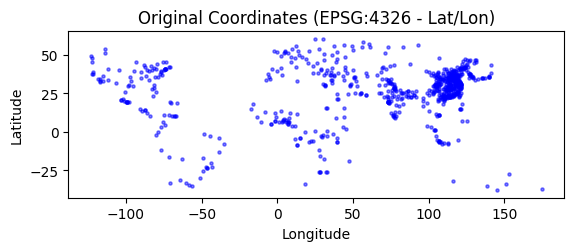

Projection Issues: Near the poles, areas are stretched. 
Distance calculations using simple Euclidean geometry on this map would be wrong.


<Figure size 1000x500 with 0 Axes>

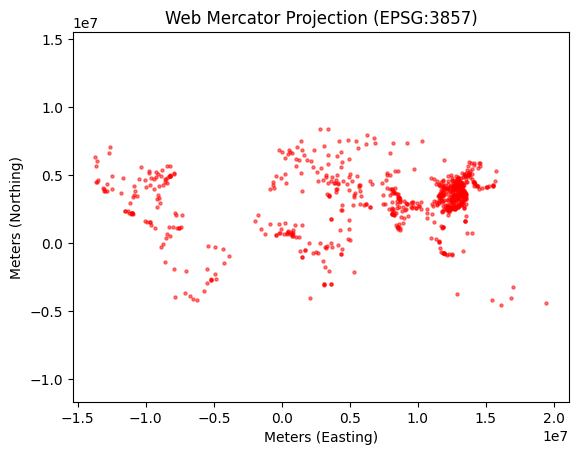

In [ ]:
print("\n--- STEP 4: PROJECTIONS ---")

# Convert pandas DF to GeoDataFrame
gdf = gpd.GeoDataFrame(
    major_cities,
    geometry=gpd.points_from_xy(major_cities.lng, major_cities.lat),
    crs="EPSG:4326" # WGS84 - Latitude/Longitude
)

# Plot Original (Plate Carrée / Equirectangular appearance)
plt.figure(figsize=(10, 5))
gdf.plot(markersize=5, color='blue', alpha=0.5)
plt.title("Original Coordinates (EPSG:4326 - Lat/Lon)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print("Projection Issues: Near the poles, areas are stretched. \nDistance calculations using simple Euclidean geometry on this map would be wrong.")

# Convert to Web Mercator (EPSG:3857) - Used by Google Maps
gdf_mercator = gdf.to_crs(epsg=3857)

# Plot Projected
plt.figure(figsize=(10, 5))
gdf_mercator.plot(markersize=5, color='red', alpha=0.5)
plt.title("Web Mercator Projection (EPSG:3857)")
plt.xlabel("Meters (Easting)")
plt.ylabel("Meters (Northing)")
plt.axis('equal')
plt.show()


--- STEP 5: VISUALIZATIONS ---


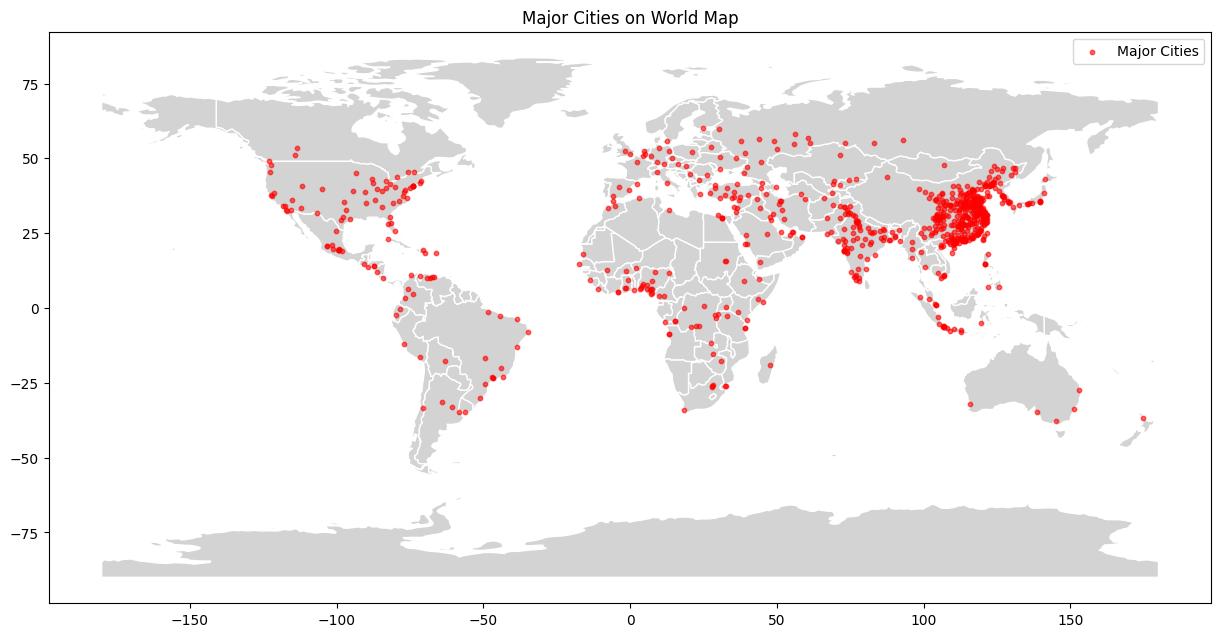

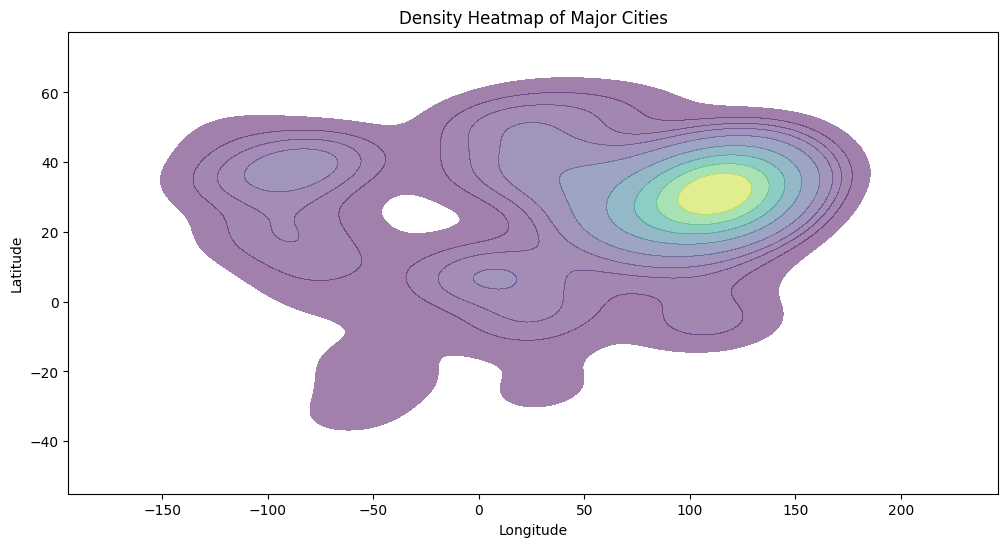

In [ ]:
print("\n--- STEP 5: VISUALIZATIONS ---")

# --- FIX START ---
# gpd.datasets.get_path is removed in GeoPandas 1.0.
# We load the data directly from the official source URL instead.
world_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_url)
# --- FIX END ---

# A. Scatter Plot on World Map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='white')
gdf.plot(ax=ax, color='red', markersize=10, alpha=0.6, label='Major Cities')
plt.title("Major Cities on World Map")
plt.legend()
plt.show()

# B. Heatmap (Density by Region) using Seaborn KDE
plt.figure(figsize=(12, 6))
sns.kdeplot(x=major_cities['lng'], y=major_cities['lat'], fill=True, cmap="viridis", alpha=0.5)
plt.title("Density Heatmap of Major Cities")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


--- STEP 6: SPATIAL JOIN ---


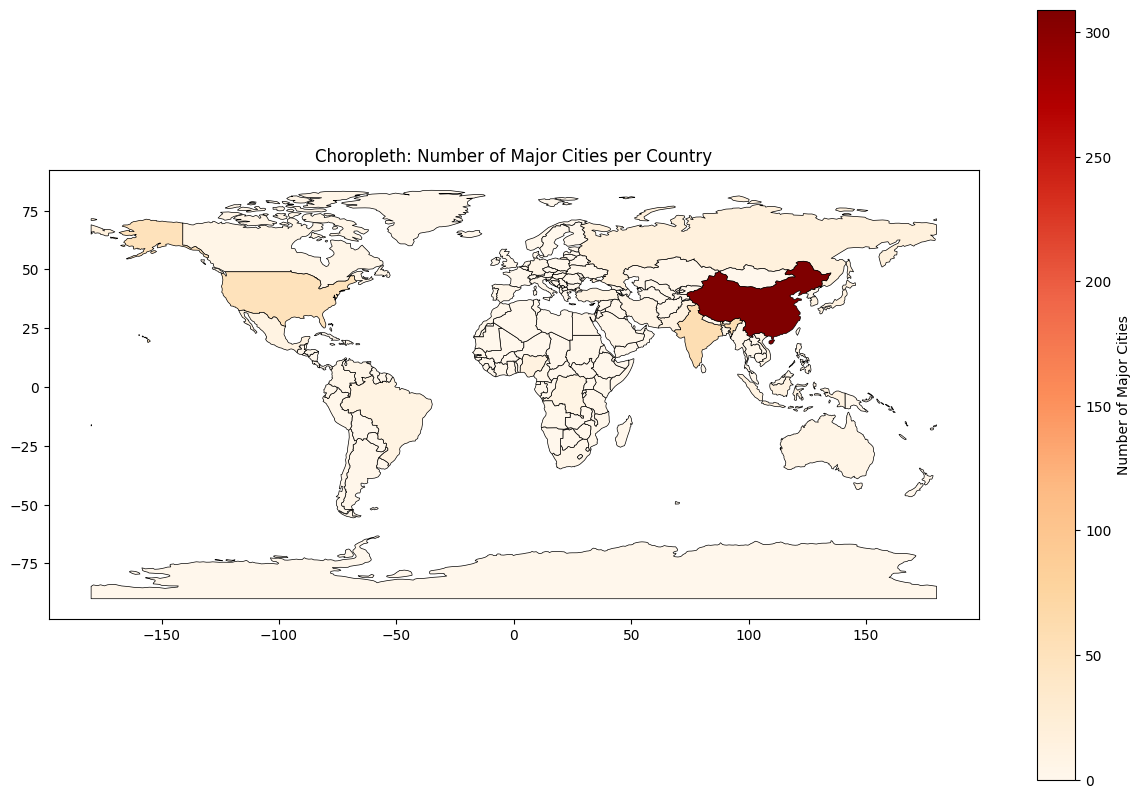


Top 5 Countries by number of Major Cities (>1M):
                        ADMIN  city_count
20                      China         309
41                      India          58
101  United States of America          51
79                     Russia          16
68                    Nigeria          14


In [ ]:
print("\n--- STEP 6: SPATIAL JOIN ---")

# Reproject world to match cities (EPSG:4326) just in case
world = world.to_crs("EPSG:4326")

# Perform Spatial Join: Match cities (Points) to Countries (Polygons)
cities_with_country = gpd.sjoin(gdf, world, how="inner", predicate="within")

# Count cities per country
# We use 'ADMIN' which is the standard country name column in Natural Earth data
country_counts = cities_with_country.groupby('ADMIN').size().reset_index(name='city_count')

# Merge counts back to world geometry for plotting
world_counts = world.merge(country_counts, on='ADMIN', how='left')
world_counts['city_count'] = world_counts['city_count'].fillna(0)

# C. Choropleth Map showing city density (count) by country
fig, ax = plt.subplots(figsize=(15, 10))
world_counts.plot(column='city_count', ax=ax, legend=True,
                  legend_kwds={'label': "Number of Major Cities"},
                  cmap='OrRd', edgecolor='black', linewidth=0.5)
plt.title("Choropleth: Number of Major Cities per Country")
plt.show()

# Display top 5 countries
print("\nTop 5 Countries by number of Major Cities (>1M):")
print(country_counts.sort_values('city_count', ascending=False).head(5))

# 🕸️ Exercise 5: Graph Data Processing
**Dataset:** Facebook Social Circles (`facebook_combined.txt`)
**Topic:** Network Analysis, Centrality Measures, Community Detection

In [7]:
!pip install python-louvain

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

G = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")

adj_matrix = nx.to_numpy_array(G)
adj_list = nx.to_dict_of_lists(G)

print("Adjacency Matrix Sample:")
print(adj_matrix[:5, :5])

print("Adjacency List Sample (First 5 nodes):")
for node in list(adj_list.keys())[:5]:
    print(f"{node}: {adj_list[node]}")

Nodes: 4039
Edges: 88234
Adjacency Matrix Sample:
[[0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
Adjacency List Sample (First 5 nodes):
0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,

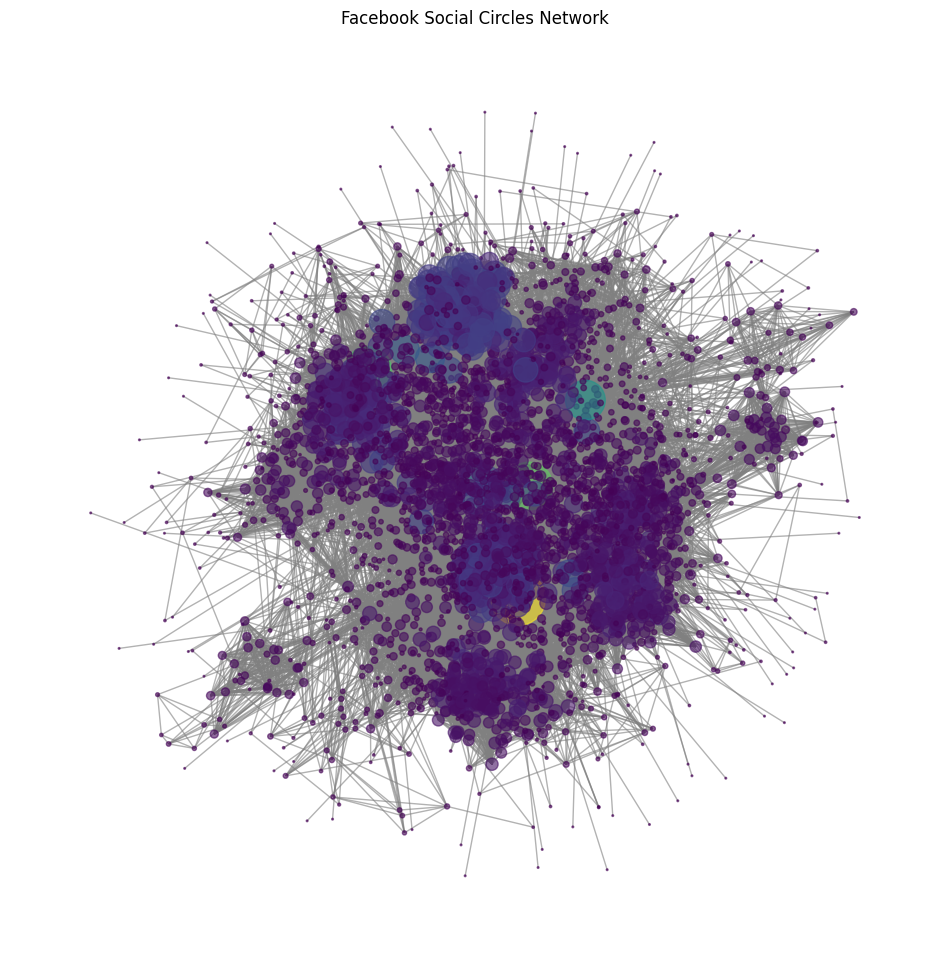

In [9]:
# --- 2. GRAPH VISUALIZATION ---
plt.figure(figsize=(12, 12))

degrees = dict(G.degree())
node_colors = [degrees[n] for n in G.nodes()]
node_sizes = [v * 1.5 for v in degrees.values()]

pos = nx.spring_layout(G, k=0.1, iterations=20)

nx.draw_networkx(
    G,
    pos,
    with_labels=False,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.viridis,
    edge_color="gray",
    alpha=0.6
)

plt.title("Facebook Social Circles Network")
plt.axis('off')
plt.show()

In [10]:
# --- 3 & 4. CENTRALITY & PAGERANK ---
print("\n--- Calculating Centrality Measures ---")

degree_cent = nx.degree_centrality(G)


betweenness_cent = nx.betweenness_centrality(G, k=200)

# 3. Closeness Centrality (Slow - requires full path calculation)

print("Calculating Closeness (this may take a minute)...")
closeness_cent = nx.closeness_centrality(G)

# 4. PageRank
pagerank_scores = nx.pagerank(G)

# Helper function to print top nodes
def print_top_nodes(metric_dict, name, n=5):
    # Sort by score descending
    sorted_nodes = sorted(metric_dict.items(), key=lambda x: x[1], reverse=True)
    print(f"\nTop {n} Nodes by {name}:")
    for node, score in sorted_nodes[:n]:
        print(f"  Node {node}: {score:.4f}")
    return [node for node, score in sorted_nodes[:n]]

# Display Results
top_deg = print_top_nodes(degree_cent, "Degree Centrality")
top_bet = print_top_nodes(betweenness_cent, "Betweenness Centrality")
top_clo = print_top_nodes(closeness_cent, "Closeness Centrality")
top_pr  = print_top_nodes(pagerank_scores, "PageRank", n=10)

# Compare PageRank vs Degree
print("\n--- Comparison: Degree vs PageRank ---")
print(f"Top 5 Degree:   {top_deg}")
print(f"Top 5 PageRank: {top_pr[:5]}")
print("Interpretation: High degree means many friends. High PageRank means friends with important people.")


--- Calculating Centrality Measures ---
Calculating Closeness (this may take a minute)...

Top 5 Nodes by Degree Centrality:
  Node 107: 0.2588
  Node 1684: 0.1961
  Node 1912: 0.1870
  Node 3437: 0.1355
  Node 0: 0.0859

Top 5 Nodes by Betweenness Centrality:
  Node 107: 0.4997
  Node 1684: 0.3410
  Node 3437: 0.2314
  Node 1912: 0.2118
  Node 1085: 0.1487

Top 5 Nodes by Closeness Centrality:
  Node 107: 0.4597
  Node 58: 0.3974
  Node 428: 0.3948
  Node 563: 0.3939
  Node 1684: 0.3936

Top 10 Nodes by PageRank:
  Node 3437: 0.0076
  Node 107: 0.0069
  Node 1684: 0.0064
  Node 0: 0.0063
  Node 1912: 0.0039
  Node 348: 0.0023
  Node 686: 0.0022
  Node 3980: 0.0022
  Node 414: 0.0018
  Node 698: 0.0013

--- Comparison: Degree vs PageRank ---
Top 5 Degree:   [107, 1684, 1912, 3437, 0]
Top 5 PageRank: [3437, 107, 1684, 0, 1912]
Interpretation: High degree means many friends. High PageRank means friends with important people.



--- 5. Community Detection (Louvain) ---
Detected 17 distinct communities (social circles).


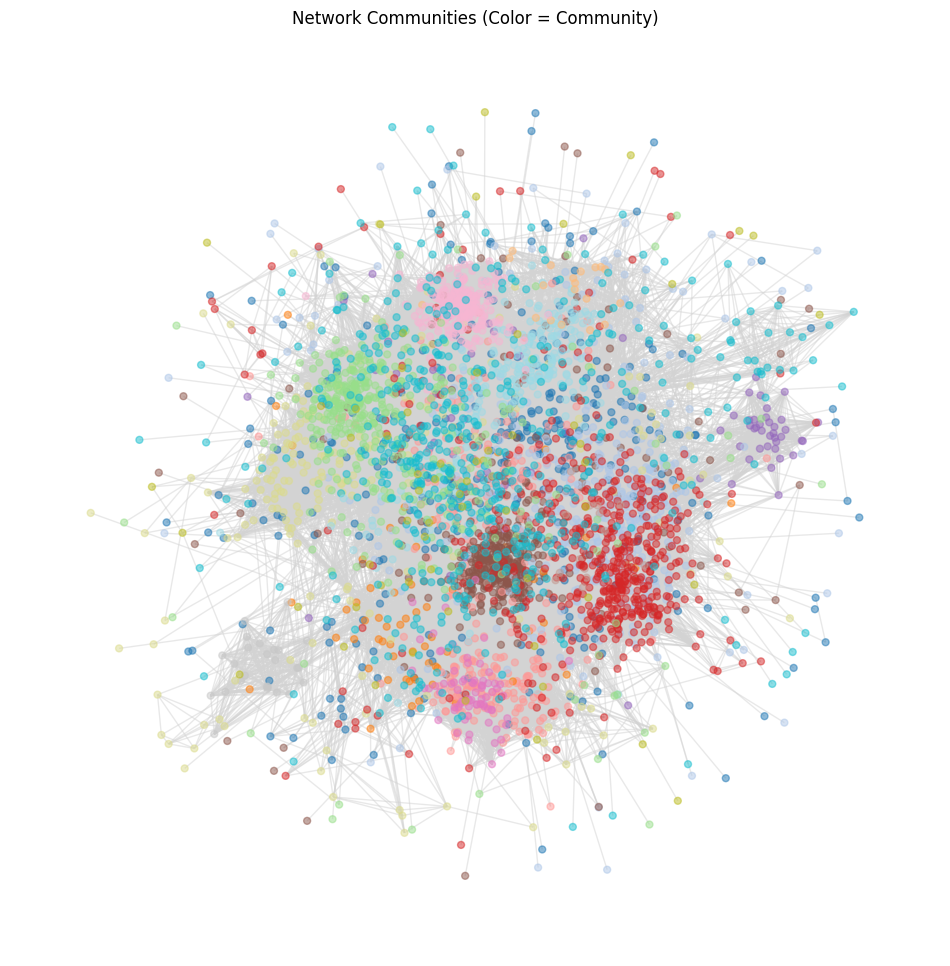


--- 6. Global Graph Features ---
Density: 0.01082 (The graph is sparse)
Avg Clustering Coefficient: 0.6055 (High clustering is typical for social networks)
Diameter: 8 (Maximum steps to reach anyone)


In [11]:
# --- 5. COMMUNITY DETECTION ---
print("\n--- 5. Community Detection (Louvain) ---")

# Compute partition
partition = community_louvain.best_partition(G)
num_communities = len(set(partition.values()))
print(f"Detected {num_communities} distinct communities (social circles).")

# Visualize Communities
cmap = plt.get_cmap('tab20')
community_colors = [partition[n] for n in G.nodes()]

plt.figure(figsize=(12, 12))
nx.draw_networkx(
    G,
    pos,
    with_labels=False,
    node_color=community_colors,
    node_size=25,
    cmap=cmap,
    edge_color="lightgray",
    alpha=0.5
)
plt.title(f"Network Communities (Color = Community)")
plt.axis('off')
plt.show()

# --- 6. GRAPH FEATURES ---
print("\n--- 6. Global Graph Features ---")

# Density: How many edges exist vs how many are possible
density = nx.density(G)
print(f"Density: {density:.5f} (The graph is sparse)")

avg_clustering = nx.average_clustering(G)
print(f"Avg Clustering Coefficient: {avg_clustering:.4f} (High clustering is typical for social networks)")

# Diameter: Longest shortest path (approximate if graph is disconnected, but this dataset is usually connected)
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print(f"Diameter: {diameter} (Maximum steps to reach anyone)")
else:
    print("Graph is not connected, calculating diameter of largest component...")
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    print(f"Diameter (Largest Component): {nx.diameter(subgraph)}")